In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


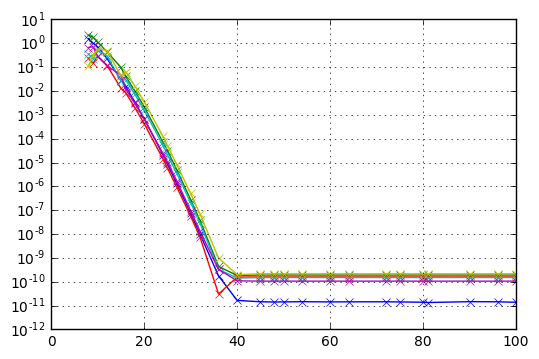

In [97]:
D = loadtxt("../../fft/pw.txt", skiprows=5)

Ng = D[:, 0]
pw_eigs = D[:, 2:]

eigs_conv = pw_eigs[-1,:]
for i in range(6):
    semilogy(Ng, abs(pw_eigs[:, i]-eigs_conv[i]), "x-")
grid()
xlim([0, 100])
show()

In [98]:
print "Converged (reference) eigenvalues"
for i in range(6):
    print i+1, eigs_conv[i]

Converged (reference) eigenvalues
1 -8.26205289525
2 -0.299481483774
3 2.89936778228
4 4.20728102835
5 4.20864326663
6 7.67297757757


IndexError: index 2 is out of bounds for axis 1 with size 2

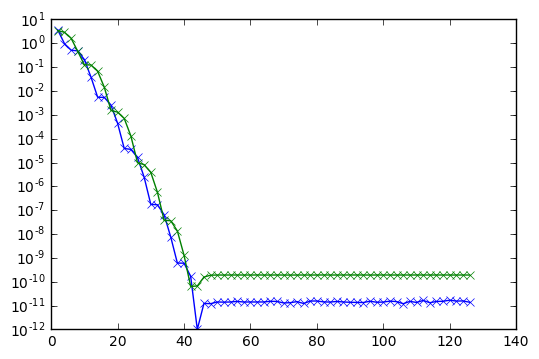

In [115]:
D = loadtxt("../sfem2.txt")

sfem_DOFs = D[:, 0]
sfem_p = D[:, 1]
sfem_eigs = D[:, 5:]

for i in range(6):
    semilogy(sfem_DOFs, abs(sfem_eigs[:, i]-eigs_conv[i]), "x-")
grid()
xlim([0, 100])
show()

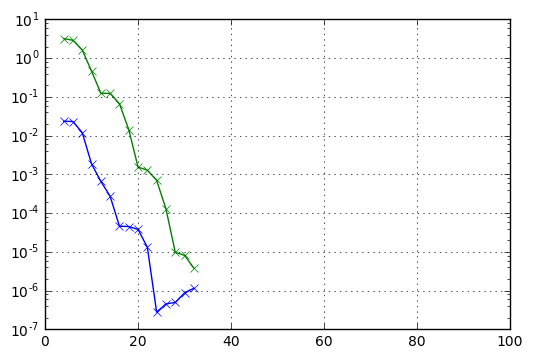

In [125]:
D = loadtxt("../sfem_enr.txt")

sfem_enr_DOFs = D[:, 0]
sfem_enr_p = D[:, 1]
sfem_enr_eigs = D[:, 5:]

for i in range(2):
    semilogy(sfem_enr_DOFs, abs(sfem_enr_eigs[:, i]-eigs_conv[i]), "x-")
grid()

xlim([0, 100])
show()

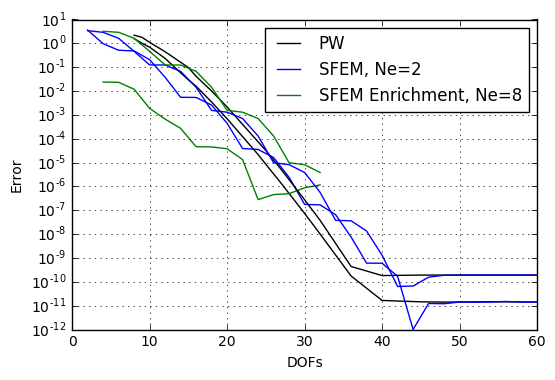

In [126]:
Neig = 2
for i in range(Neig):
    if i == 0:
        kwargs = {"label": "PW"}
    else:
        kwargs = {}
    semilogy(Ng, abs(pw_eigs[:, i]-eigs_conv[i]), "k-", **kwargs)
    if i == 0:
        kwargs = {"label": "SFEM, Ne=2"}
    else:
        kwargs = {}
    semilogy(sfem_DOFs, abs(sfem_eigs[:, i]-eigs_conv[i]), "b-", **kwargs)
    if i == 0:
        kwargs = {"label": "SFEM Enrichment, Ne=8"}
    else:
        kwargs = {}
    semilogy(sfem_enr_DOFs, abs(sfem_enr_eigs[:, i]-eigs_conv[i]), "g-", **kwargs)

grid()
xlim([0, 60])
xlabel("DOFs")
ylabel("Error")
legend()
#savefig("conv1d.pdf")
show()

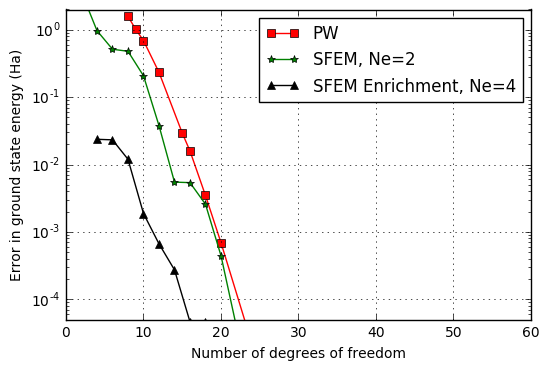

In [143]:
Neig = 1
semilogy(Ng, abs(sum(pw_eigs[:, :Neig],axis=1)-sum(eigs_conv[:Neig])), "rs-", label="PW")
semilogy(sfem_DOFs, abs(sum(sfem_eigs[:, :Neig],axis=1)-sum(eigs_conv[:Neig])), "g*-", label="SFEM, Ne=2")
semilogy(sfem_enr_DOFs, abs(sum(sfem_enr_eigs[:, :Neig],axis=1)-sum(eigs_conv[:Neig])), "k^-", label="SFEM Enrichment, Ne=4")

grid()
xlim([0, 60])
ylim([5e-5, 2])
xlabel("Number of degrees of freedom")
ylabel("Error in ground state energy (Ha)")
legend()
savefig("conv1d.pdf")
show()

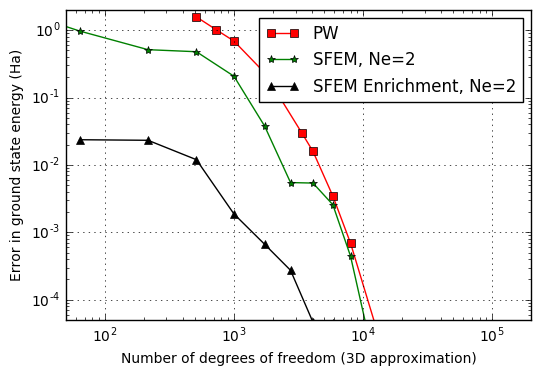

In [144]:
Neig = 1
loglog(Ng**3, abs(sum(pw_eigs[:, :Neig],axis=1)-sum(eigs_conv[:Neig])), "rs-", label="PW")
loglog(sfem_DOFs**3, abs(sum(sfem_eigs[:, :Neig],axis=1)-sum(eigs_conv[:Neig])), "g*-", label="SFEM, Ne=2")
loglog(sfem_enr_DOFs**3, abs(sum(sfem_enr_eigs[:, :Neig],axis=1)-sum(eigs_conv[:Neig])), "k^-", label="SFEM Enrichment, Ne=2")

grid()
xlim([50, 2e5])
ylim([5e-5, 2])
xlabel("Number of degrees of freedom (3D approximation)")
ylabel("Error in ground state energy (Ha)")
legend()
savefig("conv1d_3d.pdf")
show()